##### 세그먼트 트리
- 구간 합, 최소값, 최대값 등의 쿼리를 빠르게 처리하기 위해 사용되는 자료구조 
- 이진 트리(binary tree)를 기반으로 하며, 각 노드는 해당 구간의 합, 최소값, 최대값 등의 값을 저장한다.
- N = 5

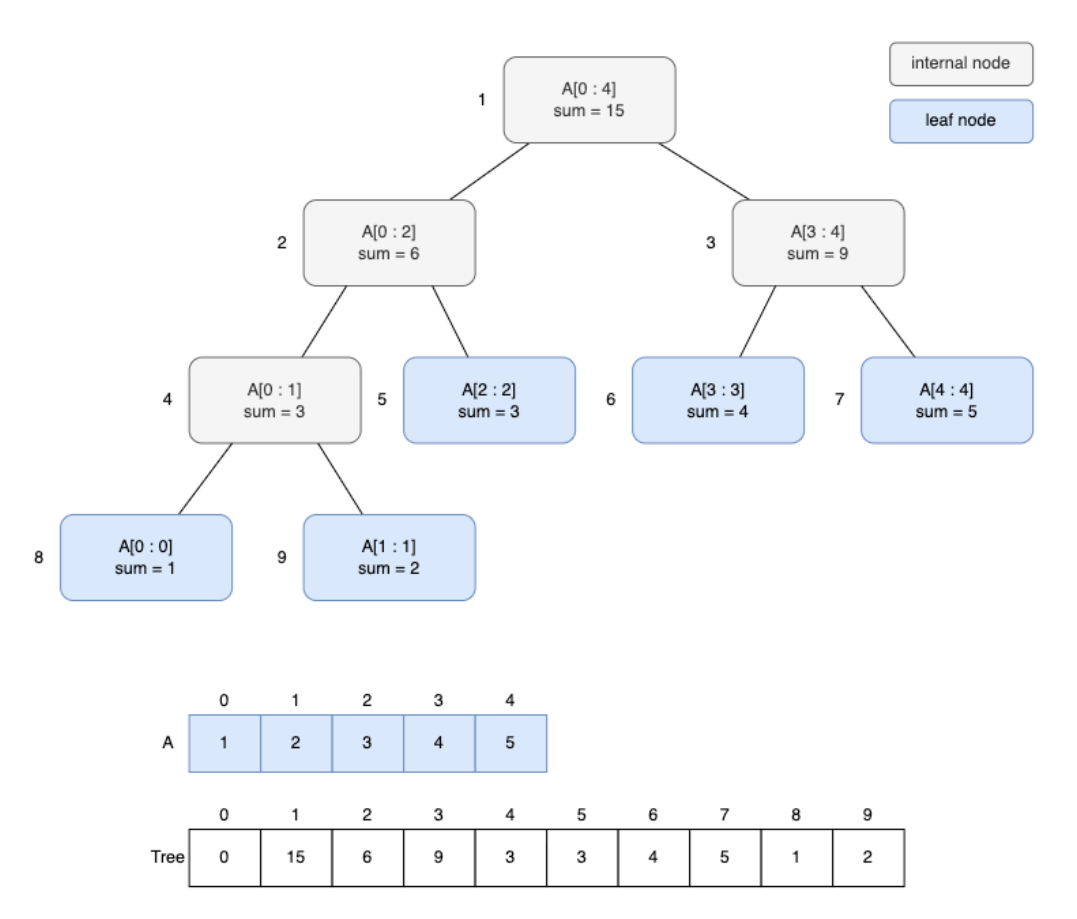

1. 구성
    - 기본 배열을 이용하여 세그먼트 트리를 초기화, 배열의 각 요소가 세그먼트 트리의 각 리프 노드에 대응된다.
    - 이진 트리의 성질을 이용하여, 각 노드가 나타내는 구간을 두 개의 서브트리로 나눈다.
    - 각 노드에 대해, 해당 구간의 합, 최소값, 최대값 등의 값을 계산하여 저장한다.
    - 각 쿼리에 대해, 세그먼트 트리를 탐색하여 필요한 값을 계산한다.
        - 리프 노드 : 배열의 그 수 자체
        - 다른 노드 : 왼쪽 자식과 오른쪽 자식의 합을 저장

2. 시간 복잡도
    - 트리의 높이가 log(N)이므로, 쿼리 처리 시간은 O(log N)
    - 구간 합, 최소값, 최대값 외에도 다른 연산(예: 구간 최소값의 인덱스 찾기)을 빠르게 처리할 수 있는 장점

3. 장점
    - 구간 합, 구간 최소값, 구간 최대값 등을 빠르게 계산할 수 있다.
    - 쿼리에 대해 O(log n)의 시간 복잡도로 처리할 수 있다.
    - 노드 수가 데이터 크기에 비례하므로 메모리 사용량이 적다.

4. 단점
    - 초기화 시간이 O(n), 세그먼트 트리를 초기화하는 데는 O(n log n)의 시간이 소요됨.
    - 각 노드에 저장하는 값이 구간의 요약 정보이기 때문에, 구간의 값이 변경될 때마다 해당 구간을 포함하는 모든 노드의 값을<br>
    업데이트해주어야 한다. 이로 인해 구간 업데이트의 시간 복잡도가 O(log n)

5. 활용 예시
    - 구간 합 구하기
        - 주어진 배열의 특정 구간 내의 합을 구하는 문제
    - 구간 최솟값, 최댓값 구하기
        - 주어진 배열의 특정 구간 내의 최솟값이나 최댓값을 구하는 문제
    - 구간 업데이트
        - 주어진 배열의 특정 구간에 대해 값을 업데이트하는 문제
    - 수열의 구간에 대한 통계값 구하기
        - 주어진 수열의 특정 구간에 대해 중앙값, 평균값, 표준편차 등의 통계값을 구하는 문제
    - 최대 연속 부분합 구하기
        - 주어진 배열에서 최대 연속 부분합을 구하는 문제

##### 작성 원리
1. 트리 초기화하기
- 리프 노드의 개수가 데이터의 개수(N) 이상이 되도록 트리 리스트를 만듭니다.
- 트리 리스트 크기: 2^k ≥ N을 만족하는 k의 최솟값을 구한 후 2^k * 2를 트리 리스트의 크기로 정의
- 예: N = 8 => 2^3 * 2 = 16 

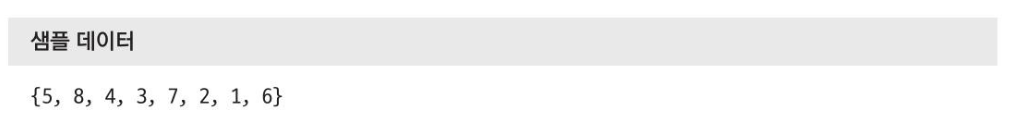

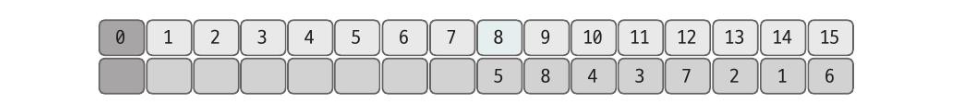

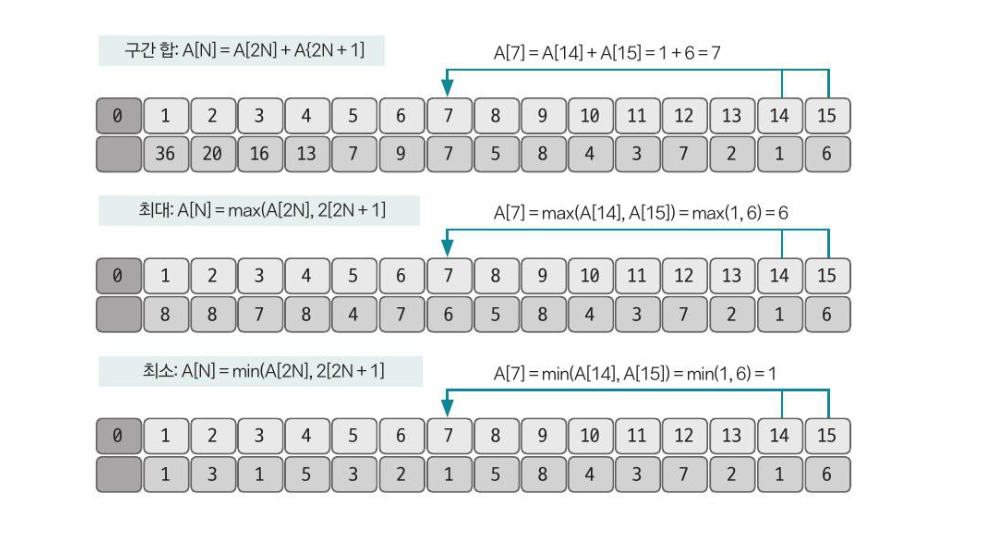

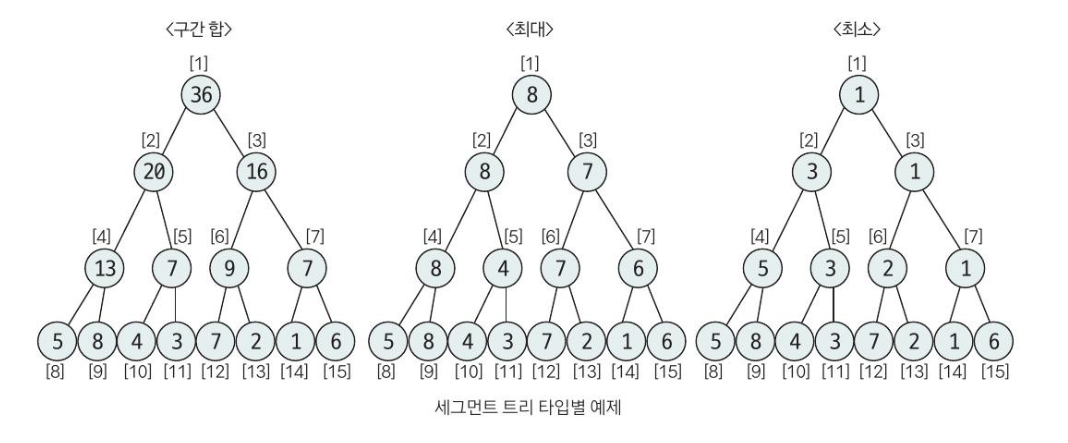

2. 질의값 구하기
- 주어진 질의 인덱스를 세그먼트 트리의 리프 노드에 해당하는 인덱스로 변경합니다.

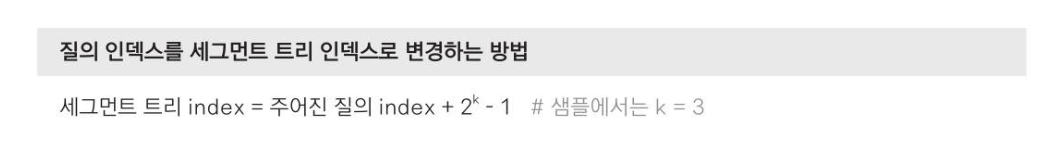

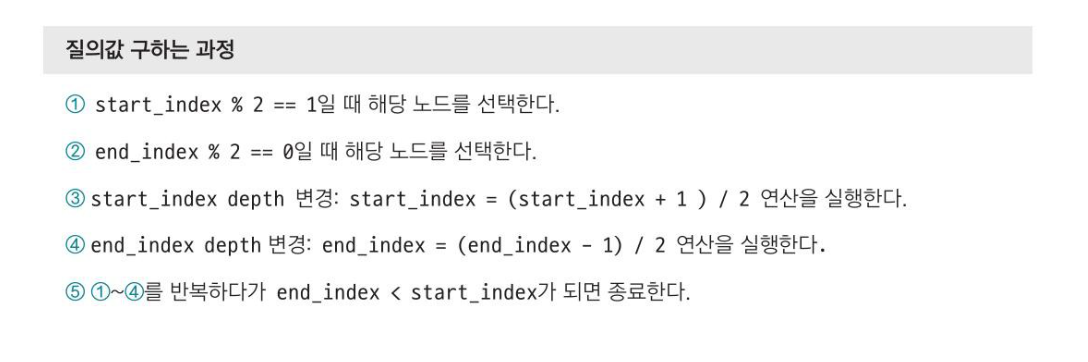

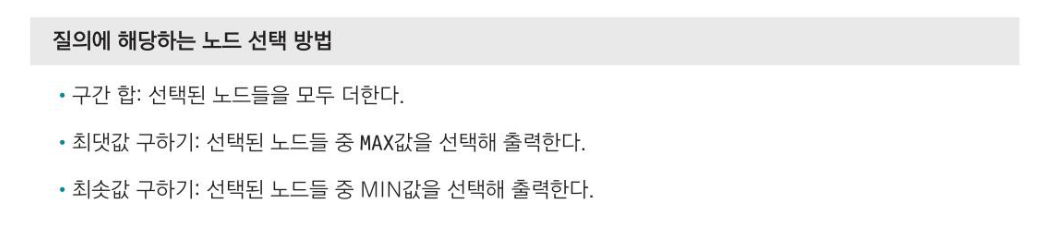

- 2 ~ 6 구간 합

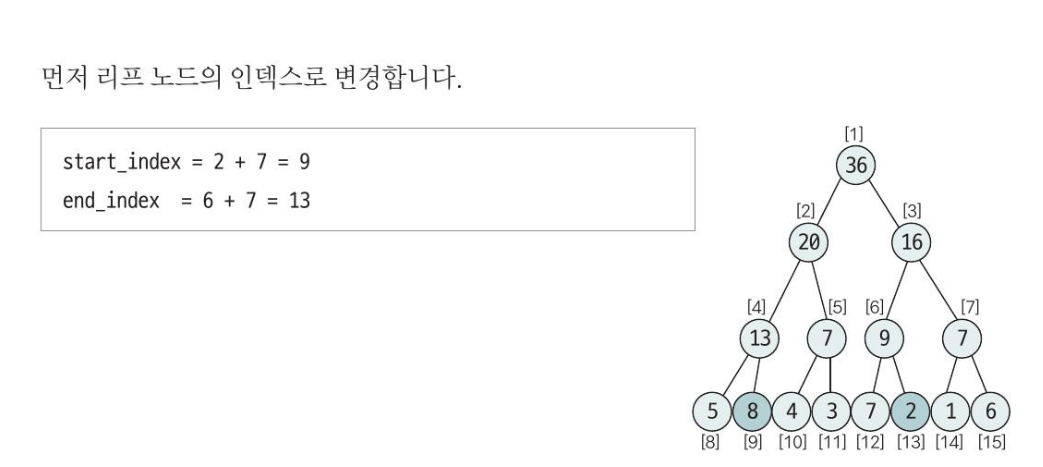

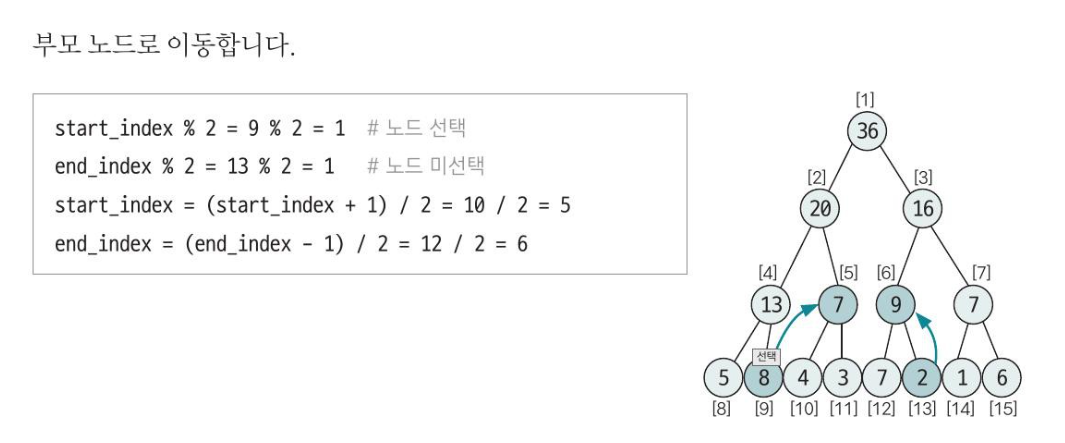

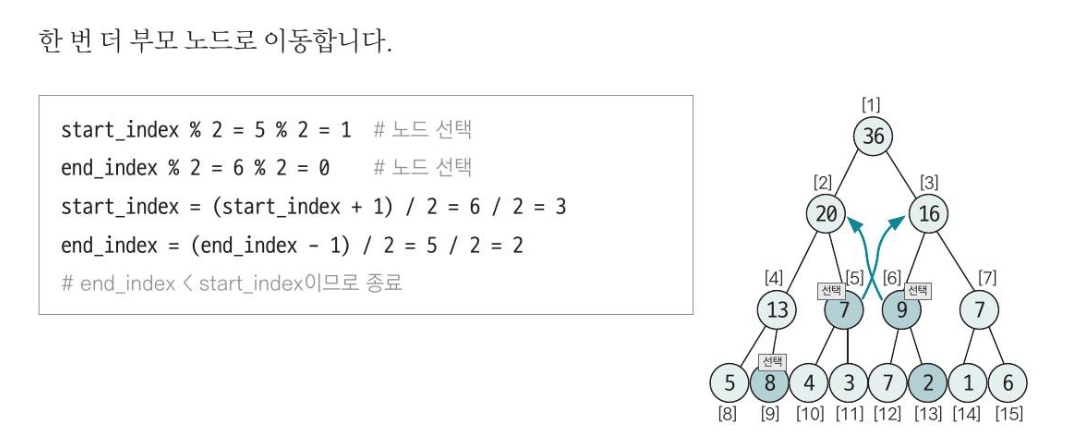

- 2~6번 구간 합의 값은 선택된 노드들의 합 => 8 + 9 + 7 = 24

3. 데이터 업데이트하기

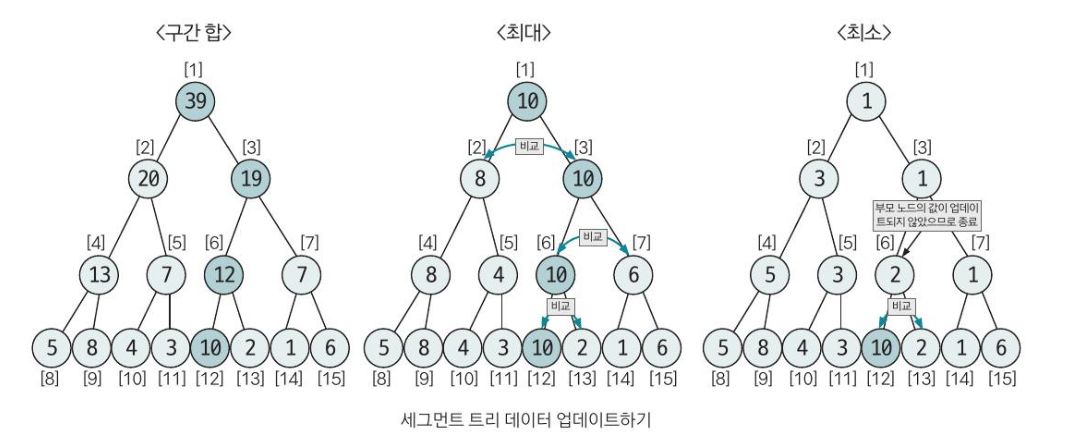

##### [문제] 구간 합 계산하기

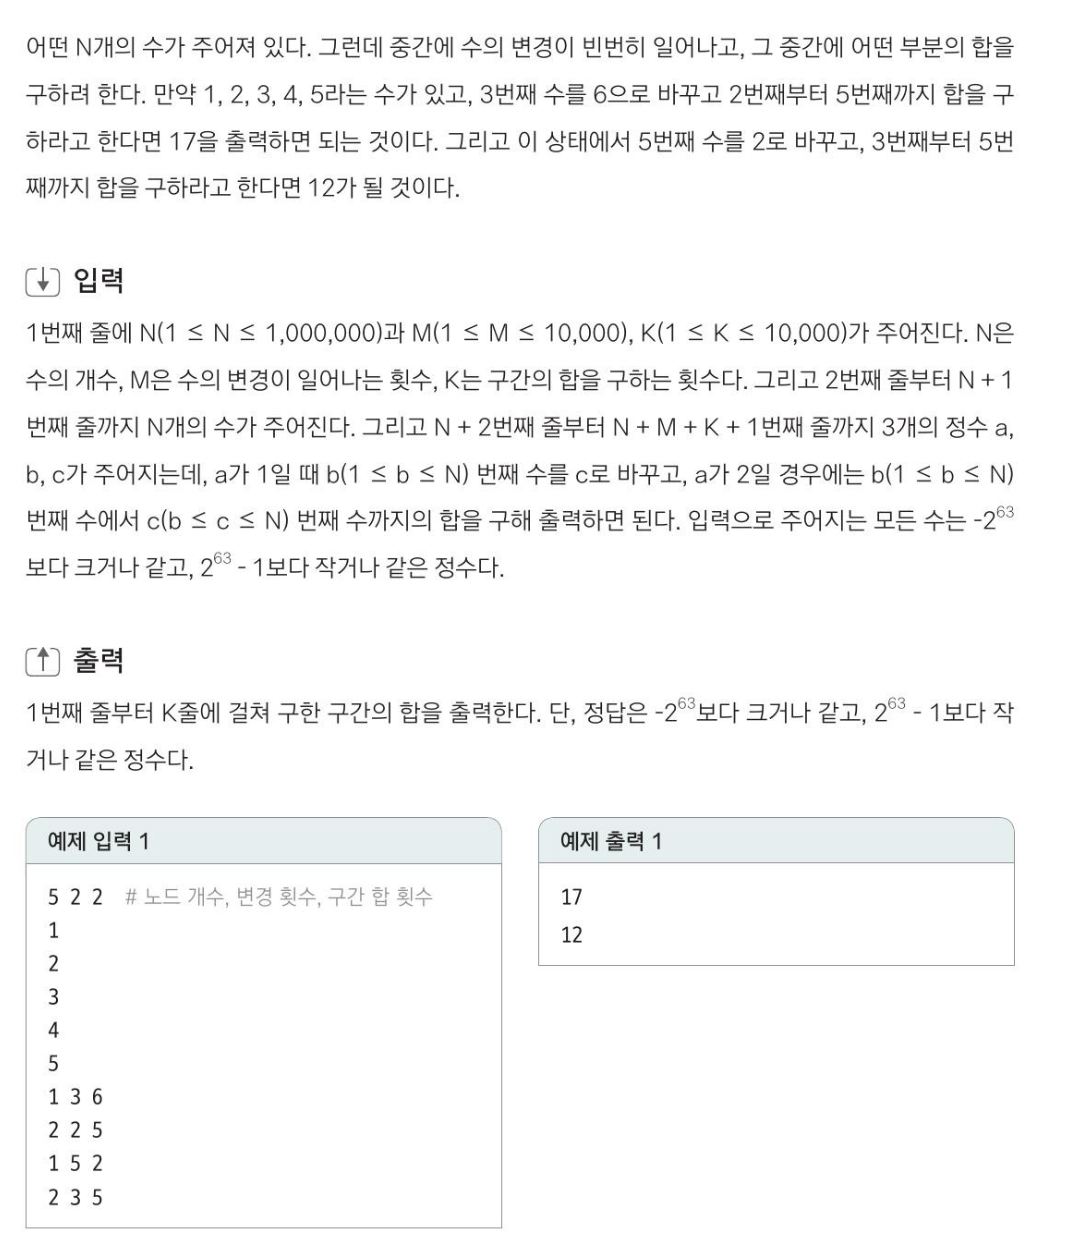

In [4]:
n, m, k = map(int, input().split()) # n: 수의 개수, m: 수의 변경이 일어나는 횟수, k: 구간의 합을 구하는 횟수
treeHeight = 0  # 트리의 높이
length = n      # 트리의 길이

# 최소 제곱수 구하기
while length != 0:   # 트리의 높이 구하기
    length //= 2      # 트리의 길이를 2로 나누기
    treeHeight += 1  # 트리의 높이 1 증가
    
treeSize = pow(2, treeHeight + 1) # 트리의 크기, 2의 treeHeight+1 제곱
leftNodeStartIndex = treeSize // 2 - 1 # 왼쪽 노드의 시작 인덱스

tree = [0] * (treeSize + 1) # 트리 생성

for i in range(leftNodeStartIndex + 1, leftNodeStartIndex + n + 1): # 트리에 수 입력
    tree[i] = int(input())
    
# 인덱스 트리 생성 함수
def setTree(i):
    while i != 1:
        tree[i // 2] += tree[i]
        i -= 1
        
setTree(treeSize-1) # 인덱스 트리 생성

# 업데이트 함수
def update(i, num):
    diff = num - tree[i]
    while i > 0:
        tree[i] += diff
        i //= 2
        
# 구간 합 함수
def getSum(s, e):
    result = 0  # 구간 합
    while e >= s:   # 종료위치가 시작위치보다 크거나 같으면 종료
        if s % 2 == 1:
            result += tree[s]
            s += 1
        if e % 2 == 0:
            result += tree[e]
            e -= 1
        s //= 2
        e //= 2
    return result

for i in range(k+m):
    q, s, e = map(int, input().split())
    if q == 1:
        update(leftNodeStartIndex + s, e)
    elif q == 2:
        s = s + leftNodeStartIndex
        e = e + leftNodeStartIndex
        print(getSum(s, e))

17
12
